<a href="https://colab.research.google.com/github/AtifahKamilah/Pejuang_Data_3/blob/main/Atifah_Husnun_K_Mini_Project_Kelas_Dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Campus Recruitment

##Latar Belakang Dataset

Kumpulan data ini terdiri dari data Penempatan mahasiswa di kampus XYZ. Ini termasuk persentase sekolah menengah dan sekolah menengah atas dan spesialisasi. Ini juga termasuk spesialisasi gelar, jenis dan Pengalaman kerja dan tawaran gaji kepada siswa yang ditempatkan.

## Pertanyaan Analisis

1. Faktor apa yang mempengaruhi seorang kandidat dalam mendapatkan tempat?
2. Apakah persentase penting bagi seseorang untuk ditempatkan?
3. Spesialisasi gelar apa yang banyak diminati oleh perusahaan?
4. Bermain dengan data yang melakukan semua uji statistik.

##EDA (Exploratory Data Analysis)

# Import Library

In [1]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Mengakses dataset

In [2]:
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')
df.head() 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [32]:
df.drop(['sl_no'],axis=1,inplace=True)

In [33]:
df['status'].values[df['status']=='Not Placed'] = 0 
df['status'].values[df['status']=='Placed'] = 1
df.status = df.status.astype('int')

In [34]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,<NA>
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


# Drawing Insights

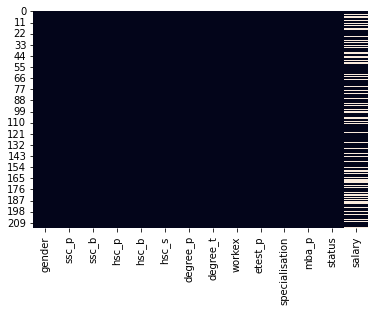

In [36]:
sns.heatmap(df.isnull(), cbar=False) #mencari kolom dengan nilai nan

In [37]:
df['salary'] = df['salary'].replace(np.nan, 0) #mengganti Nan dengan 0

In [38]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.688372
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.464240
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000


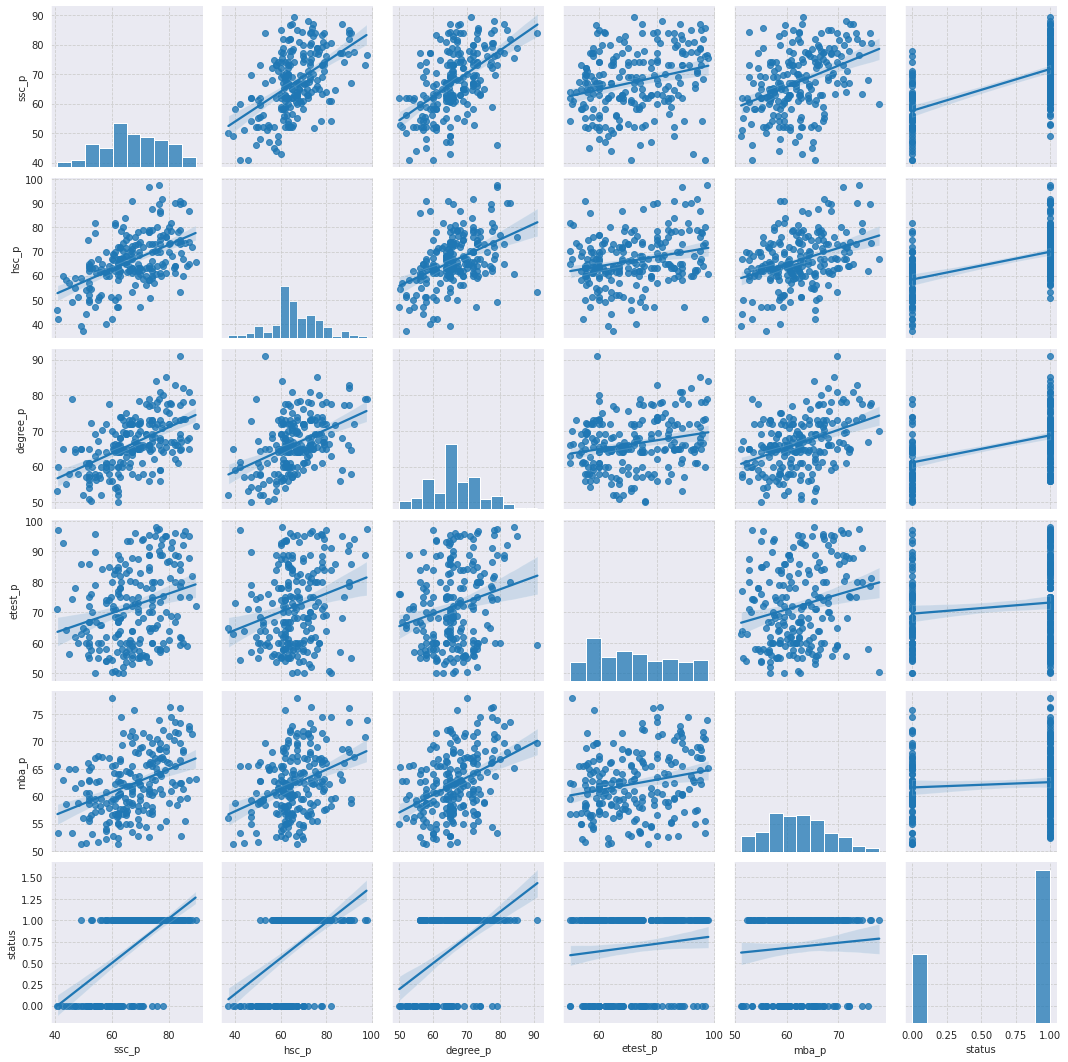

In [39]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.pairplot(df,kind='reg')
plt.show()

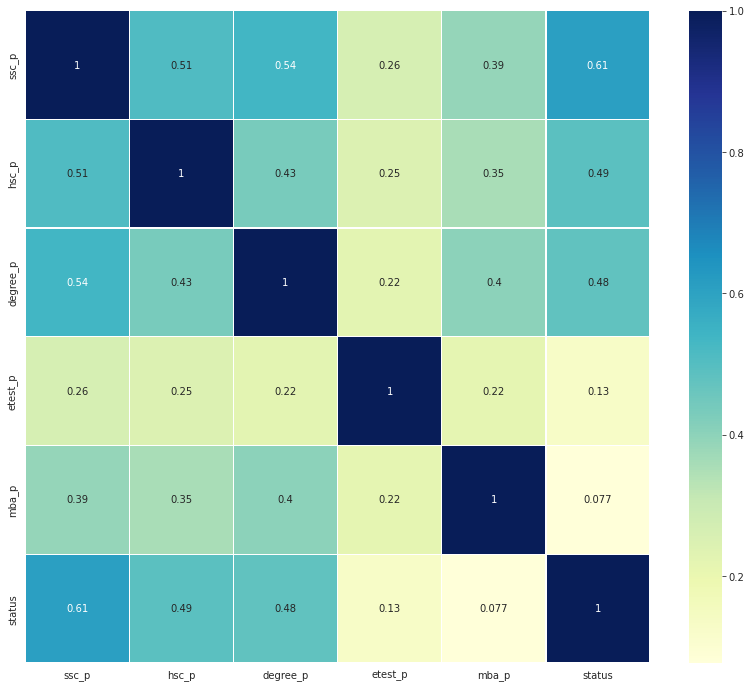

In [40]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidth=0.2, cmap="YlGnBu", annot=True)
plt.show()

Persentase MBA dan persentase E-test adalah variabel yang paling tidak signifikan yang mempengaruhi hasil penempatan.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



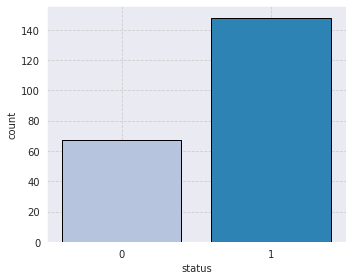

In [41]:
plt.figure(figsize=(5,4))
sns.countplot(df['status'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Ada sekitar 2 kali lebih banyak siswa yang ditempatkan dibandingkan dengan yang tidak ditempatkan.

# Signifikansi Gender

Apakah Gender memainkan peran penting atau tidak?

In [42]:
pd.DataFrame(df.groupby(['gender','status'])['status'].count())

status
gender status        
F      0           28
       1           48
M      0           39
       1          100

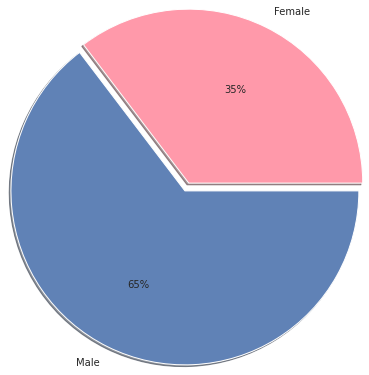

In [43]:
out_df=pd.DataFrame(df.groupby('gender')['gender'].count())
colors = ['#ff99aa','#6082B6']
plt.pie(out_df['gender'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



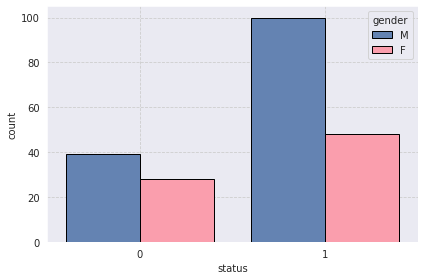

In [44]:
sns.countplot(df['status'],hue=df['gender'],palette= ['#6082B6','#ff99aa'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [45]:
Boys_placed=100
Total_Boys=139
Boys_placed_prop=Boys_placed/Total_Boys


Girls_placed=48
Total_Girls=68
Girls_placed_prop=Girls_placed/Total_Girls

print('Proportion of boys got placed: ') , 
print(Boys_placed_prop)

print('\nProportion of girls got placed: ') , 
print(Girls_placed_prop)

Proportion of boys got placed: 
0.7194244604316546

Proportion of girls got placed: 
0.7058823529411765


Dari plot diatas, didapatkan :
1. kita melihat bahwa anak laki-laki mendapatkan lebih banyak penempatan dan rasio anak laki-laki dan perempuan (penempatan) adalah sekitar 100:50.
2. jumlah anak perempuan yang tidak ditempatkan adalah 30 dan Jumlah anak laki-laki yang tidak ditempatkan adalah 40.
3. namun proporsi penempatan keduanya sama, yaitu 71%. Oleh karena itu, Gender TIDAK PENTING untuk ditempatkan.

# Signifikansi Tanda

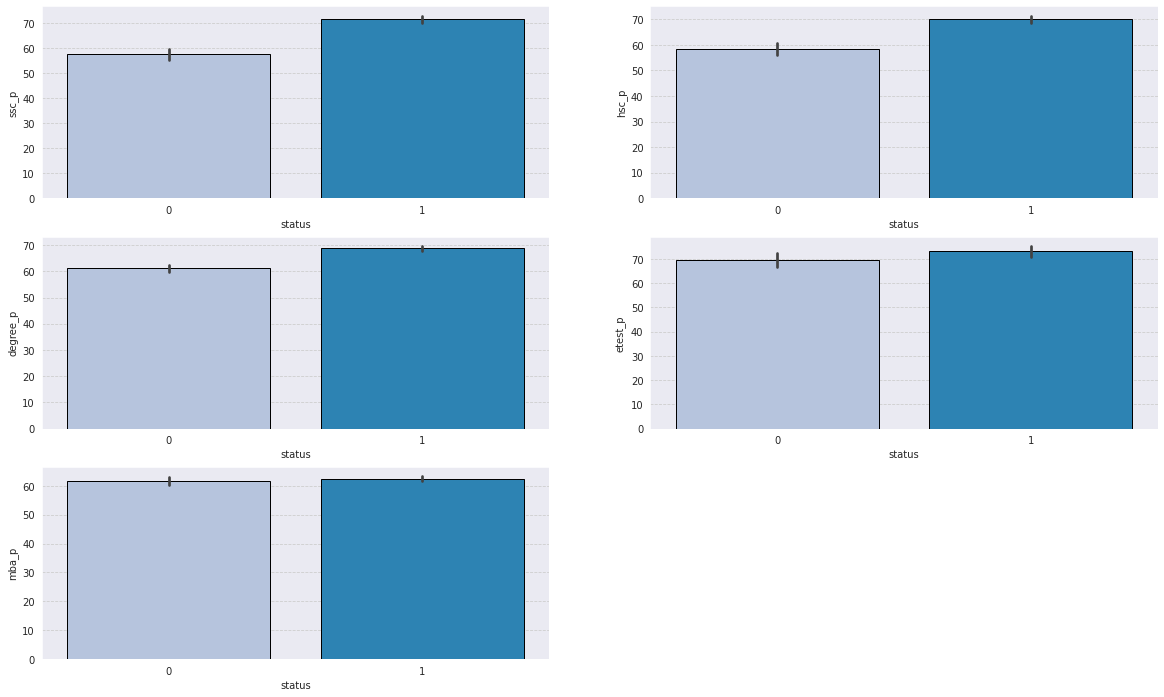

In [46]:
fig,axes = plt.subplots(3,2, figsize=(20,12))
sns.barplot(x='status', y='ssc_p', data=df, ax=axes[0][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='hsc_p', data=df, ax=axes[0][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='degree_p',data=df, ax=axes[1][0],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='etest_p',data=df, ax=axes[1][1],palette='PuBu',saturation=0.9,edgecolor="black")
sns.barplot(x='status', y='mba_p', data=df, ax=axes[2][0],palette='PuBu',saturation=0.9,edgecolor="black")
fig.delaxes(ax = axes[2][1]) 

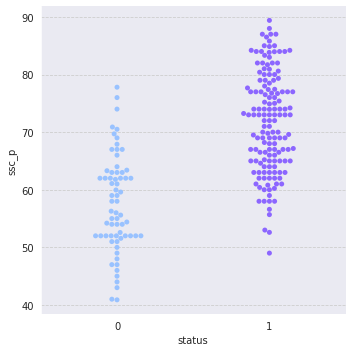

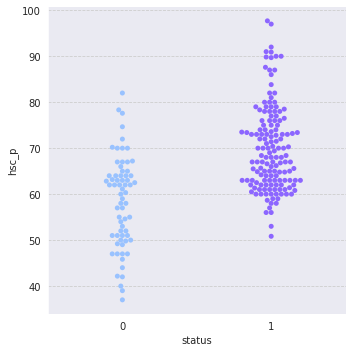

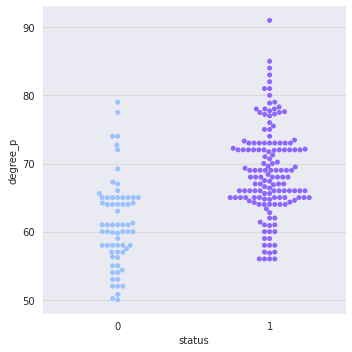

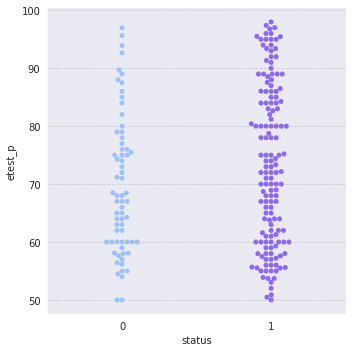

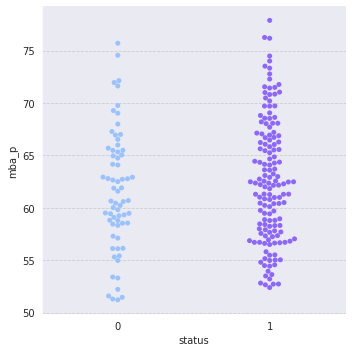

In [47]:
sns.catplot(x="status", y="ssc_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="hsc_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="degree_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="etest_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
sns.catplot(x="status", y="mba_p", data=df,kind="swarm",palette= ['#99c2ff','#8c66ff'])
plt.show()

Siswa yang mendapat nilai kurang dari 60 persen di kelas 10 atau 12 sebagian besar tidak ditempatkan. Jadi, Ya, Persentase penting untuk penempatan seperti yang telah di lihat dari HeatMap di bagian sebelumnya. Tapi, Persentase yang Lebih Tinggi tentu tidak menjamin Penempatan. Etest dan persentase MBA tidak masalah.

Signifikansi pengalaman kerja

In [48]:
pd.DataFrame(df.groupby(['workex','status'])['status'].count())

status
workex status        
No     0           57
       1           84
Yes    0           10
       1           64

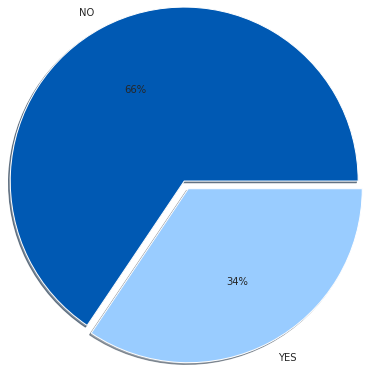

In [49]:
out_df=pd.DataFrame(df.groupby('workex')['workex'].count())
colors = ['#0059b3','#99ccff']
plt.pie(out_df['workex'],labels=['NO','YES'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show() #untuk melihat komposisi pengalaman kerja

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



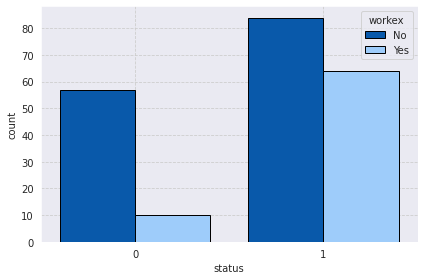

In [50]:
sns.countplot(df['status'],hue=df['workex'],palette= ['#0059b3','#99ccff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [51]:
Y_placed=64
Total_Y=74
Y_placed_prop=Y_placed/Total_Y


N_placed=84
Total_N=141
N_placed_prop=N_placed/Total_N

print('Proportion of student with work experience got placed: ') , 
print(Y_placed_prop)

print('\nProportion of students with No work experience got placed: ') , 
print(N_placed_prop)

Proportion of student with work experience got placed: 
0.8648648648648649

Proportion of students with No work experience got placed: 
0.5957446808510638


Dari data diatas, dapat disimpulkan bahwa:
1. Siswa yang memiliki pengalaman kerja lebih mungkin untuk ditempatkan adalah 86%.
2. 59% mahasiswa yang tidak memiliki pengalaman kerja terpilih.

# Signifikansi Spesialisasi

In [52]:
pd.DataFrame(df.groupby(['specialisation','status'])['status'].count())

status
specialisation status        
Mkt&Fin        0           25
               1           95
Mkt&HR         0           42
               1           53

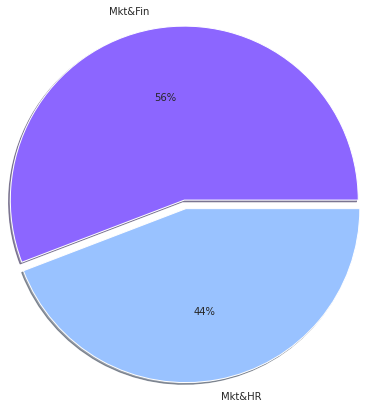

In [53]:
out_df=pd.DataFrame(df.groupby('specialisation')['specialisation'].count())
colors = ['#8c66ff','#99c2ff']
plt.pie(out_df['specialisation'],labels=['Mkt&Fin','Mkt&HR'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show() #untuk melihat komposisi Spesialisasi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



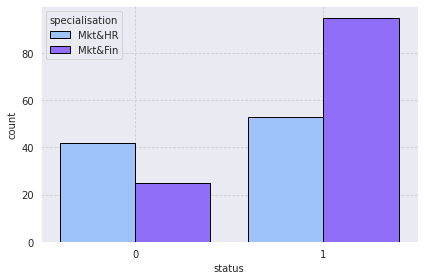

In [54]:
sns.countplot(df['status'],hue=df['specialisation'],palette= ['#99c2ff','#8c66ff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [55]:
MH_placed=53
Total_MH=95
MH_placed_prop=MH_placed/Total_MH


MF_placed=95
Total_MF=120
MF_placed_prop=MF_placed/Total_MF

print('Proportion of student from Market and HR got placed: ') , 
print(MH_placed_prop)

print('\nProportion of students from Market and finance got placed: ') , 
print(MF_placed_prop)

Proportion of student from Market and HR got placed: 
0.5578947368421052

Proportion of students from Market and finance got placed: 
0.7916666666666666


Dari plot dan perhitungan diatas:
Spesialisasi Pemasaran dan Keuangan Paling Diminta oleh Perusahaan.

# Apakah Dewan sekolah benar-benar penting?

Papan SSC

In [56]:
pd.DataFrame(df.groupby(['ssc_b','status'])['status'].count())

status
ssc_b   status        
Central 0           38
        1           78
Others  0           29
        1           70

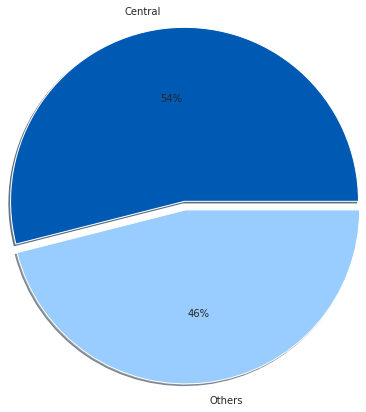

In [58]:
out_df=pd.DataFrame(df.groupby('ssc_b')['ssc_b'].count())
colors = ['#0059b3','#99ccff']
plt.pie(out_df['ssc_b'],labels=['Central','Others'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show() #untuk melihat komposisi ssc_b

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



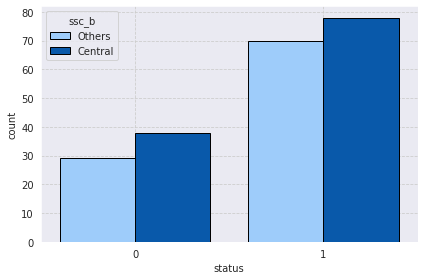

In [59]:
sns.countplot(df['status'],hue=df['ssc_b'],palette= ['#99ccff','#0059b3'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [60]:
print('Proportion of student having central board in SSC got placed: ') , 
print(78/(78+38))

print('\nProportion of students having other board in SSC got placed: ') , 
print(70/(70+29))

Proportion of student having central board in SSC got placed: 
0.6724137931034483

Proportion of students having other board in SSC got placed: 
0.7070707070707071


Papan HSC

In [61]:
pd.DataFrame(df.groupby(['hsc_b','status'])['status'].count())

status
hsc_b   status        
Central 0           27
        1           57
Others  0           40
        1           91

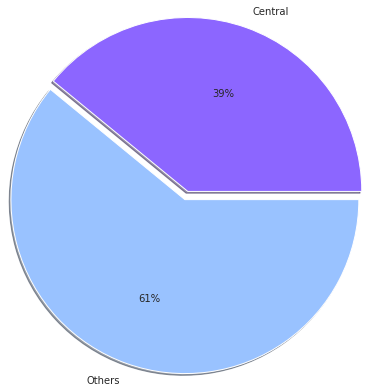

In [62]:
out_df=pd.DataFrame(df.groupby('hsc_b')['hsc_b'].count())
colors = ['#8c66ff','#99c2ff']
plt.pie(out_df['hsc_b'],labels=['Central','Others'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show() #untuk melihat komposisi dari hsc_b

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



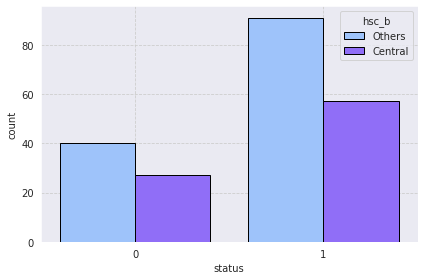

In [63]:
sns.countplot(df['status'],hue=df['hsc_b'],palette= ['#99c2ff','#8c66ff'],saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [64]:
print('Proportion of student having central board in HSC got placed: ') , 
print(57/(57+27))

print('\nProportion of students having other board in HSC got placed: ') , 
print(91/(91+40))

Proportion of student having central board in HSC got placed: 
0.6785714285714286

Proportion of students having other board in HSC got placed: 
0.6946564885496184


Kita mendapatkan wawasan berikut dari grafik dan perhitungan di atas:
Persentase siswa mendapat tempat dari:

1. Pengurus pusat di SSC : 67%
2. Board lain di SSC : 71%
3. Pengurus pusat di HSC : 67%
4. Papan lain di HSC : 69%

Kita dapat melihat di sini bahwa tidak ada perbedaan yang signifikan antara memilih papan di SSC atau HSC akan membantu Anda mendapatkan tempat. Jadi, tidak masalah apakah Anda melakukan pendidikan dari dewan pusat atau dewan lainnya.

# Apakah Aliran HSC penting?

In [65]:
pd.DataFrame(df.groupby(['hsc_s','status'])['status'].count())

status
hsc_s    status        
Arts     0            5
         1            6
Commerce 0           34
         1           79
Science  0           28
         1           63

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



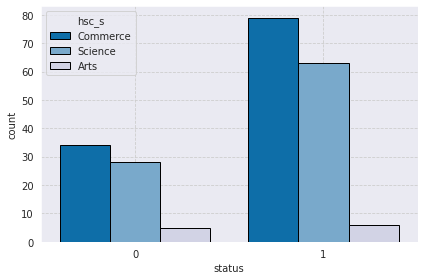

In [66]:
sns.countplot(df['status'],hue=df['hsc_s'],palette='PuBu_r',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [67]:
print('Proportion of commerce student got placed: ') , 
print(79/(79+34))

print('\nProportion of science students got placed: ') , 
print(63/(63+28))

Proportion of commerce student got placed: 
0.6991150442477876

Proportion of science students got placed: 
0.6923076923076923


Lebih baik memilih Perdagangan atau Sains, tetapi aliran perdagangan akan bermanfaat karena akan membantu siswa membangun fondasi yang kuat dalam studi Bisnis. Siswa dari Seni sangat sedikit oleh karena itu kami mengabaikan kelas itu

# Jenis Gelar

In [68]:
pd.DataFrame(df.groupby(['degree_t','status'])['status'].count())

status
degree_t  status        
Comm&Mgmt 0           43
          1          102
Others    0            6
          1            5
Sci&Tech  0           18
          1           41

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



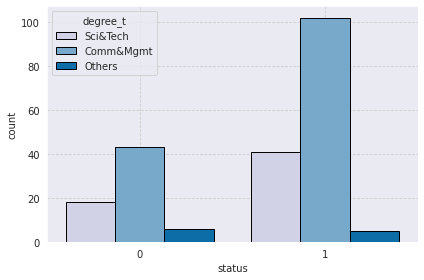

In [69]:
sns.countplot(df['status'],hue=df['degree_t'],palette='PuBu',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [70]:
print('Proportion of Comm&Mgmt student got placed: ') , 
print(102/(43+102))

print('\nProportion of Sci&Tech students got placed: ') , 
print(41/(41+18))

Proportion of Comm&Mgmt student got placed: 
0.7034482758620689

Proportion of Sci&Tech students got placed: 
0.6949152542372882


Sama seperti aliran HSC. Lebih baik memilih Comm & Mgmt atau Sci & Tech, tetapi aliran comm&Mgmt akan bermanfaat. Siswa dari yang lain sangat sedikit oleh karena itu kami mengabaikan kelas itu.

# Jadi, siapa siswa yang lebih berpeluang untuk ditempatkan?

1. Persentase kelas 10 dan kelas 12 harus lebih besar dari 60% dari papan apa pun
2. Anda seharusnya memilih perdagangan di HSC (sains juga akan berfungsi)
3. Gelar dari Commerce dan managemnet akan membantu Anda (Ilmu Pengetahuan dan Teknologi juga akan bekerja)
4. Memiliki pengalaman kerja seperti strawberry on cake. Siswa yang memiliki pengalaman kerja lebih mungkin untuk ditempatkan

# Data Preprocessing

In [72]:
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]] #Untuk menghindari jebakan variabel dummy
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x

In [75]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [76]:
df_x=df[[ 'ssc_p', 'hsc_p',  'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']]

In [77]:
for i in df_x.columns:
    if df_x[i].dtype ==object:
        print(i)
        df_x =cat_to_num(df_x,i)

hsc_s
degree_t
workex
specialisation


In [78]:
df_x.drop(['workex','specialisation','hsc_s','degree_t'],inplace =True,axis =1)

In [79]:
y = df['status']
X = df_x

**Membagi menjadi set pelatihan dan tes tes**

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

# Model Fitting

In [81]:
scores = []

**Menyesuaikan regresi logistik**

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,solver='liblinear',C=1.5)
model.fit(X_train, y_train)

LogisticRegression(C=1.5, random_state=42, solver='liblinear')

In [83]:
y_predict = model.predict(X_test)

scores.append({
        'model': 'LogisticRegression',
        'score': model.score(X_test,y_test)
    })

model.score(X_test,y_test)

0.9534883720930233

**Pohon Keputusan yang Pas.**

In [84]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='random')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [85]:
pred=model.predict(X_test)

scores.append({
        'model': 'DecisionTreeClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.9069767441860465

**Pas hutan acak**

In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [87]:
y_predict = model.predict(X_test)

scores.append({
        'model': 'RandomForestClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.9767441860465116

**Pemasangan XG-Boost**

In [88]:
from xgboost import XGBRFClassifier

model = XGBRFClassifier(eval_metric='mlogloss',
                        random_state=42,
                       learning_rate=0.01,
                       max_depth=10, 
                       scale_pos_weight=1.5)
model.fit(X_train, y_train)

XGBRFClassifier(eval_metric='mlogloss', learning_rate=0.01, max_depth=10,
                random_state=42, scale_pos_weight=1.5)

In [89]:
pred=model.predict(X_test)

scores.append({
        'model': 'XGBRFClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.8604651162790697

In [90]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [91]:
pred=model.predict(X_test)

scores.append({
        'model': 'KNeighborsClassifier',
        'score': model.score(X_test,y_test)
    })


model.score(X_test, y_test)

0.8837209302325582

# Kesimpulan

In [92]:
Score = pd.DataFrame(scores,columns=['model','score'])
Score.sort_values('score',ascending=False,inplace=True)
Score

,model,score
2,RandomForestClassifier,0.976744
0,LogisticRegression,0.953488
1,DecisionTreeClassifier,0.906977
4,KNeighborsClassifier,0.883721
3,XGBRFClassifier,0.860465


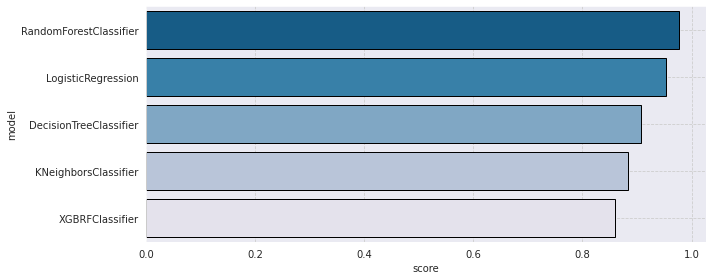

In [93]:
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['score'],palette='PuBu_r',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

**Random Forest memberikan hasil terbaik di sini**

Dan kita dapat menggunakan model Hutan Acak ini untuk memprediksi apakah seorang siswa akan ditempatkan atau tidak.